In [36]:
# splitting
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

from connections import get_dataframe


In [37]:
df = get_dataframe() # database(mysql): datasets, table: `ph-student_employability-dataset`

df['CLASS'] = df['CLASS'].map({'Employable': 1, 'LessEmployable': 2})

X = df.drop(['Name of Student', 'CLASS'], axis=1)
y = df['CLASS']

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ismot', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42))
])

cv_results = cross_validate(pipeline, X, y, cv=5, scoring=['accuracy', 'precision_macro', 'recall_macro', 'f1_macro'])

print("Cross-validation results:", cv_results)
print("Mean accuracy:", cv_results['test_accuracy'].mean())
print("Mean precision:", cv_results['test_precision_macro'].mean())
print("Mean recall:", cv_results['test_recall_macro'].mean())
print("Mean F1-score:", cv_results['test_f1_macro'].mean())

Cross-validation results: {'fit_time': array([0.29604363, 0.18681693, 0.40578246, 0.2714231 , 0.28276038]), 'score_time': array([0.01743174, 0.02098227, 0.0244956 , 0.02060103, 0.03761983]), 'test_accuracy': array([0.91289782, 0.91289782, 0.90268456, 0.91107383, 0.91442953]), 'test_precision_macro': array([0.90922338, 0.90905686, 0.89863295, 0.90751349, 0.9106972 ]), 'test_recall_macro': array([0.91391659, 0.91501048, 0.90453179, 0.91120231, 0.91631734]), 'test_f1_macro': array([0.91118105, 0.91134541, 0.90089904, 0.90913772, 0.9128992 ])}
Mean accuracy: 0.9107967128708421
Mean precision: 0.9070247746441696
Mean recall: 0.912195701937162
Mean F1-score: 0.909092484612976


classification_report:
               precision    recall  f1-score   support

           1       0.94      0.90      0.92      1729
           2       0.87      0.92      0.90      1253

    accuracy                           0.91      2982
   macro avg       0.91      0.91      0.91      2982
weighted avg       0.91      0.91      0.91      2982



<Axes: >

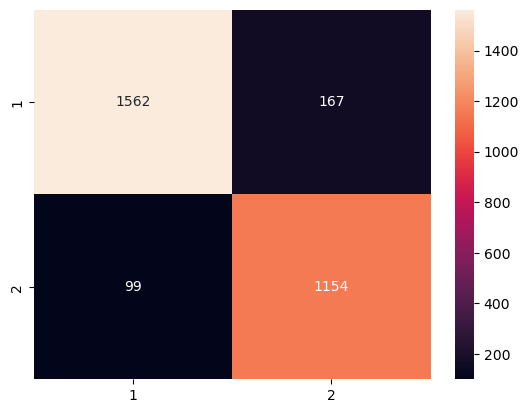

In [38]:
y_pred = cross_val_predict(pipeline, X, y, cv=5)
cm = confusion_matrix(y, y_pred)

labels = np.unique(y) 
print('classification_report:\n', classification_report(y, y_pred))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
